In [1]:
# Created 19 Apr 23
# To calculate % difference in LCUEs across scenarios (S1-S4 vs S0)
# Includes all 166 sites (just for my records)
# Useful code to see how to get colors ID
# Last part of code is more for exercise purpose (to understand what NS said)
# check python version for plots: 'diff_lcue.py'
# plots to add in Ch. 4 analysis (but not on final draft)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Move to path where csv is saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"

cwd = os.getcwd()
cwd

os.chdir(path)
cwd  #pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs/Plots modelling PJua'

In [2]:
pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs'

In [3]:
# Import df with LCUEs for each scenario
data = pd.read_csv("lcue_s0_s4.csv")

# Define function to calculate percentage change
def percentage_change(col1, col2):
    return ((col2 - col1) / col1) * 100

In [4]:
# Create new pandas DataFrame from copy of original df
perchange = data[["Site_name", "County", "Institution"]].copy()

In [5]:
# Add columns with calculated values of percentage change vs S0
perchange["S1_S0"] = percentage_change(data["S0_LCUE"], data["S1_LCUE"]).round(2)
perchange["S2_S0"] = percentage_change(data["S0_LCUE"], data["S2_LCUE"]).round(2)
perchange["S3_S0"] = percentage_change(data["S0_LCUE"], data["S3_LCUE"]).round(2)
perchange["S4_S0"] = percentage_change(data["S0_LCUE"], data["S4_LCUE"]).round(2)

In [6]:
# To see how the data looks, here it shows the % change in LCUEs of S1-S4 vs S0
perchange.describe().round(2)

,S1_S0,S2_S0,S3_S0,S4_S0
count,166.00,166.00,166.00,166.00
mean,-13.27,-25.13,-31.71,-33.88
std,24.07,18.87,14.49,13.00
min,-54.12,-58.80,-62.63,-62.63
25%,-31.25,-35.36,-41.62,-42.91
50%,-19.11,-30.96,-34.74,-35.89
75%,-0.15,-18.38,-24.52,-29.44
max,75.04,55.31,17.87,6.29


In [7]:
# To see how the data looks, here it shows the % change in LCUEs of S1-S4 vs S0 (first 10)
perchange.head(10).round(2)

,Site_name,County,Institution,S1_S0,S2_S0,S3_S0,S4_S0
0,AIC_Nadoto_Primary_School,Turkana,School,-14.95,-26.88,-37.12,-39.75
1,AIC_Nayanaekaton_Primary_School,Turkana,School,-35.41,-43.28,-47.01,-47.01
2,A_IC_Gangani_Primary_School,Kwale,School,-35.39,-35.39,-40.74,-40.74
3,Abagarse_Primary_School,Isiolo,School,-39.52,-47.13,-47.13,-47.13
4,Akadeli_Primary_School,Isiolo,School,-23.29,-39.16,-42.49,-42.49
5,Akili_Primary_School,Isiolo,School,-23.22,-35.09,-35.09,-38.46
6,Amason_Jeffah_King_Secondary_School,Kilifi,School,23.89,12.91,3.85,-1.16
7,Antorita_Primary_School,Kwale,School,-6.96,-22.53,-27.83,-30.67
8,Bahero_Primary_School,Kilifi,School,-6.93,-22.55,-29.90,-31.93
9,Balaga_Primary_School,Kilifi,School,-14.93,-22.95,-22.95,-28.56


In [8]:
# To see how the data looks, here it shows the % change in LCUEs of S1-S4 vs S0 (first 10)
perchange.tail(10).round(2)

,Site_name,County,Institution,S1_S0,S2_S0,S3_S0,S4_S0
156,Tata_Primary_School,Kwale,School,40.48,6.76,-2.67,-7.93
157,Tiwi_Boys_Secondary_school,Kwale,School,-23.23,-30.99,-34.51,-38.18
158,Todonyang_Primary_School,Turkana,School,-23.22,-31.13,-34.65,-38.17
159,Uhuru_Primary_School,Isiolo,School,-23.20,-34.88,-34.88,-39.87
160,Vithunguni_Primary_School,Kilifi,School,-27.33,-39.39,-46.62,-46.62
161,Watala_Primary_School,Kilifi,School,-13.85,-21.14,-27.70,-28.54
162,Werugha_Health_facility,Taita_Taveta,Clinic,11.30,-2.51,-11.77,-15.38
163,Yapha_Primary_School,Kwale,School,12.61,-2.80,-11.71,-16.32
164,Ziwani_Primary_School,Kilifi,School,-23.20,-26.90,-33.19,-33.19
165,Ziyaradundo_Primary_School,Kwale,School,-6.87,-14.64,-21.37,-21.37


In [9]:
# Import library to plot and set style in Seaborn
import seaborn as sns

sns.set(rc={"figure.dpi":300})
sns.set_context("notebook")  # change to paper maybe? I prefer notebook style i think...
sns.set_style("ticks") # with axis ticks, no background lines
# sns.set_style("whitegrid")

In [10]:
# To format plot with scenarios colors
print(sns.color_palette("Set2").as_hex()) # to know colours

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


In [11]:
# Define my Set2 custom palette without S0 color (skip first one)
colors = ["#fc8d62", "#8da0cb", "#e78ac3", "#a6d854"]

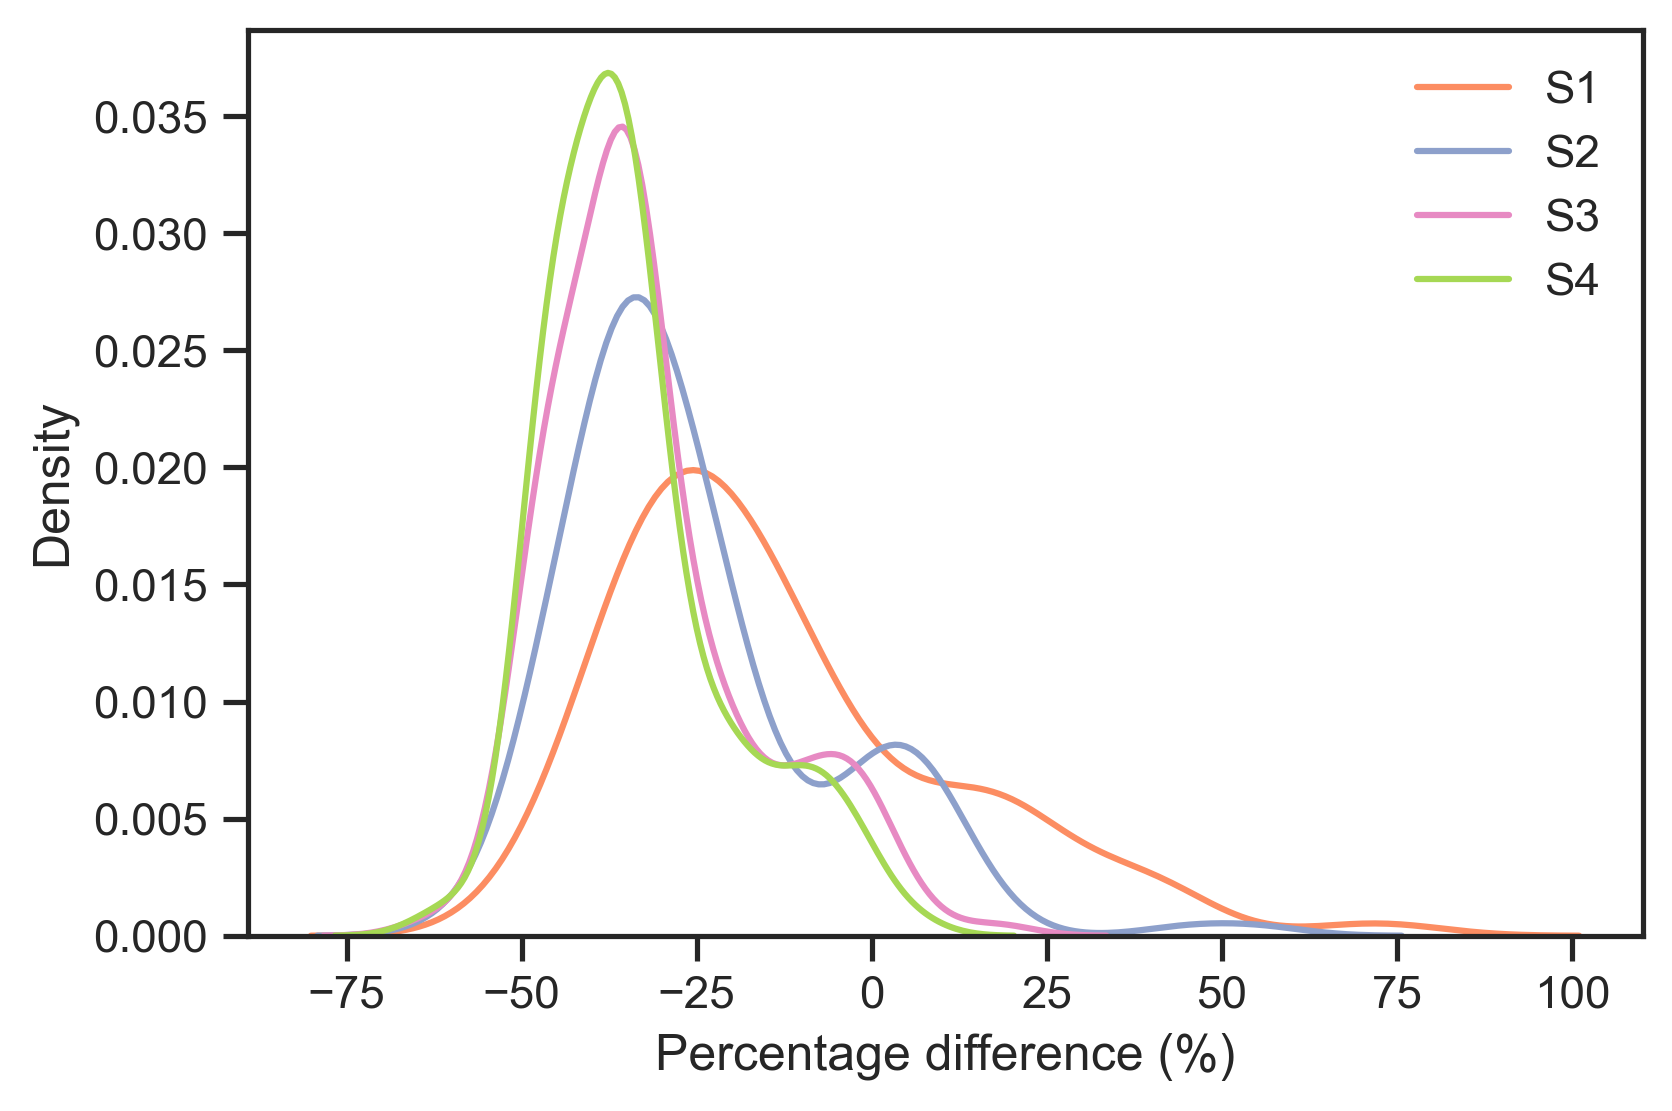

In [12]:
# Final version of plot (for now)
fig,ax = plt.subplots(1,1)
sns.kdeplot(data=perchange.S1_S0, color=colors[0],label="S1", ax=ax) # fill=True
sns.kdeplot(data=perchange.S2_S0, color=colors[1],label="S2", ax=ax) # fill=True
sns.kdeplot(data=perchange.S3_S0, color=colors[2],label="S3", ax=ax) # fill=True
sns.kdeplot(data=perchange.S4_S0, color=colors[3],label="S4", ax=ax) # fill=True
plt.xlabel("Percentage difference (%)")
plt.legend(frameon=False)

<AxesSubplot:xlabel='S1_S0', ylabel='Density'>

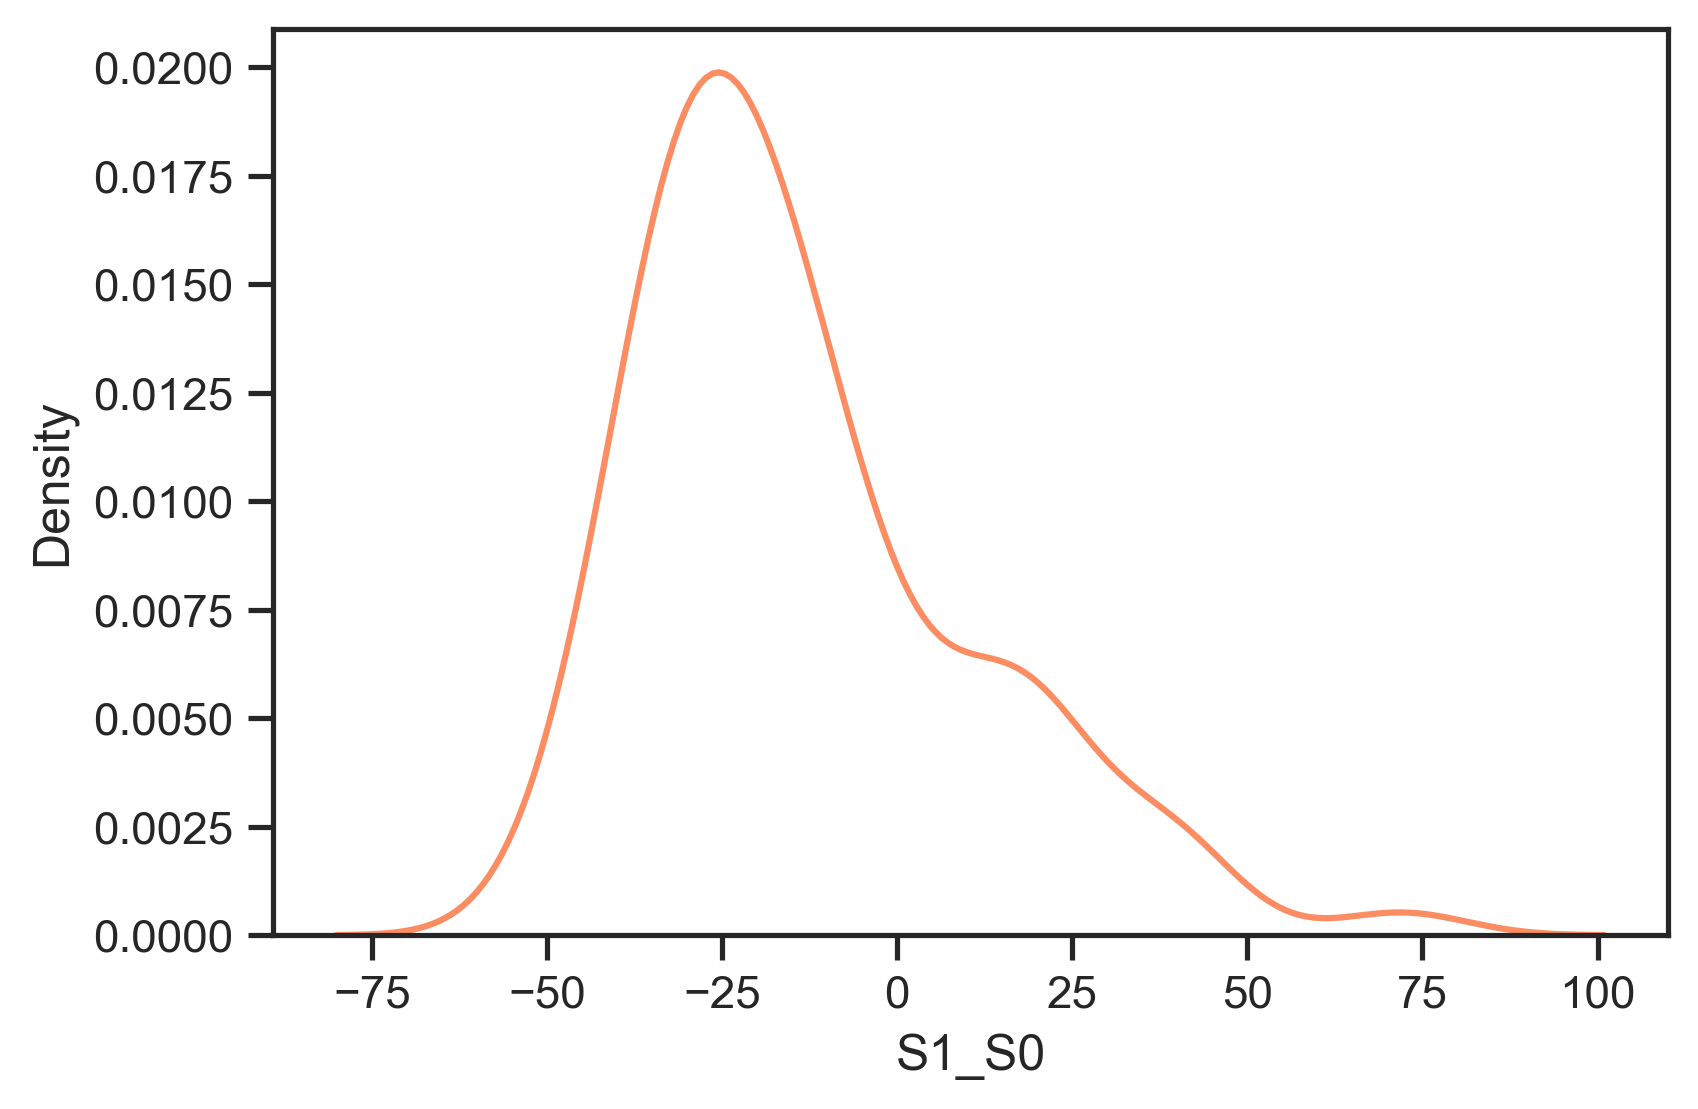

In [13]:
# Another way of plotting one by one
fig,ax = plt.subplots(1,1)
sns.kdeplot(data=perchange.S1_S0, color="#fc8d62",label="S1", ax=ax) # fill=True

<AxesSubplot:ylabel='Density'>

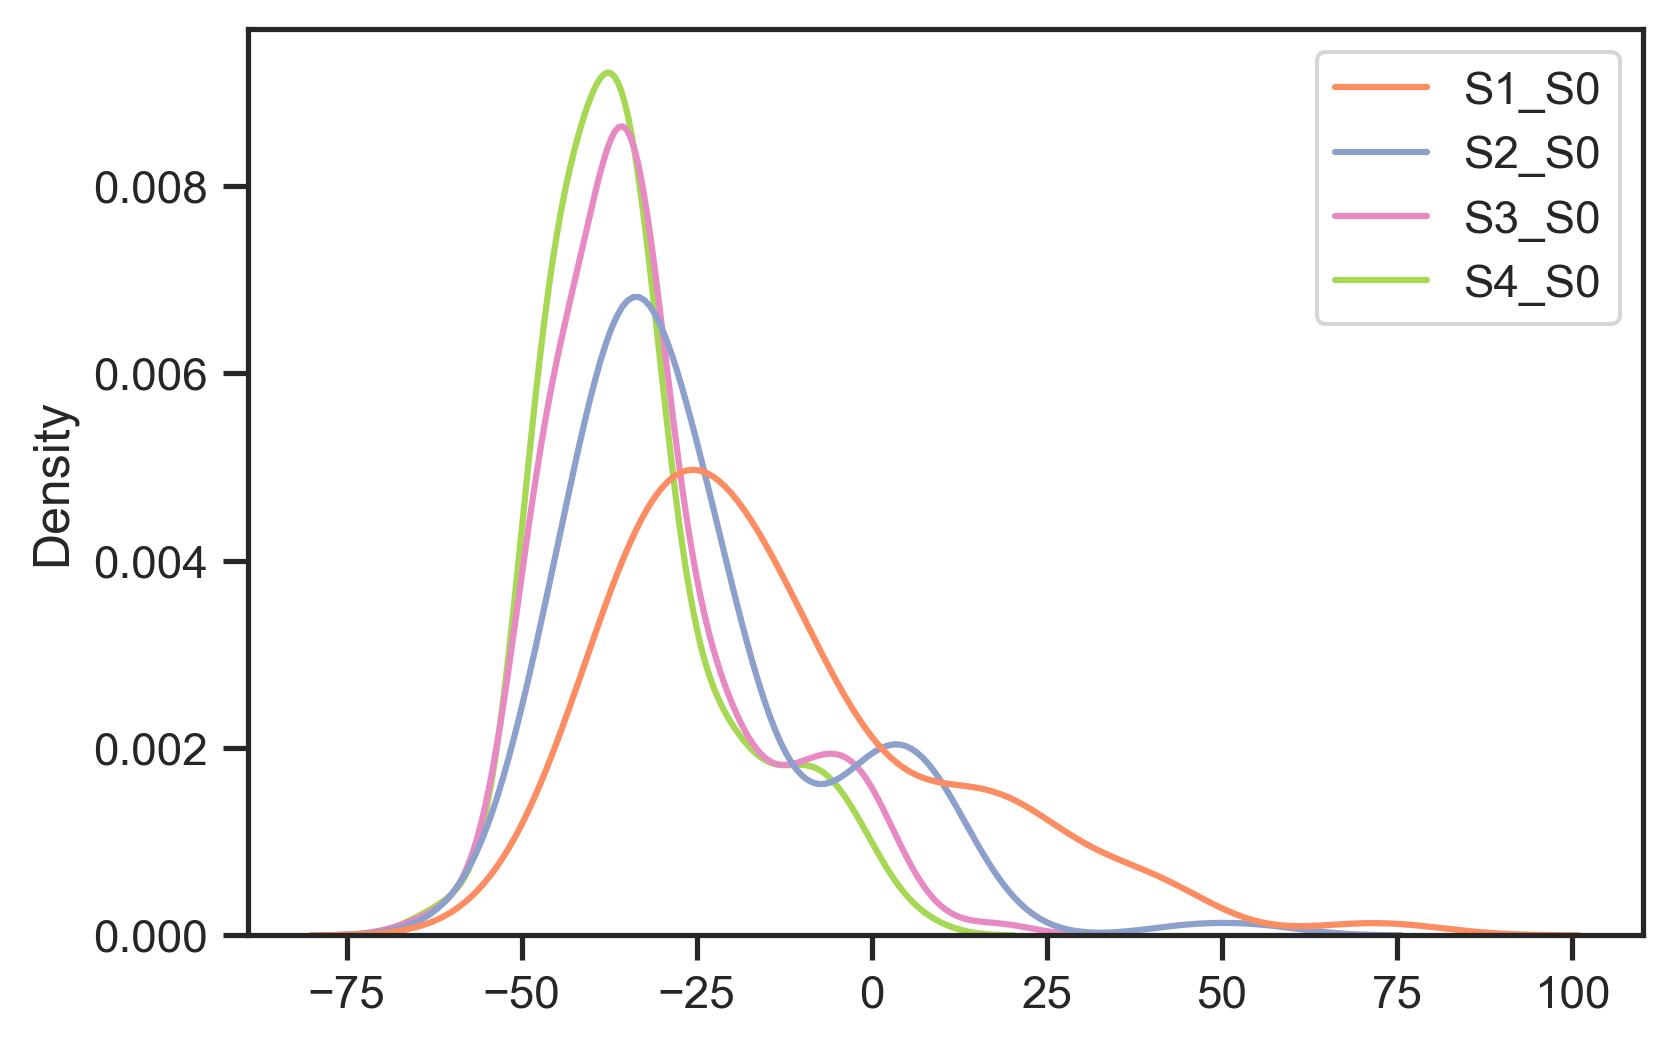

In [14]:
# Another way but it is wrong (i think) as it takes density calculating 664 in total 
# instead of 166 in each
sns.kdeplot(data=perchange, palette=colors)

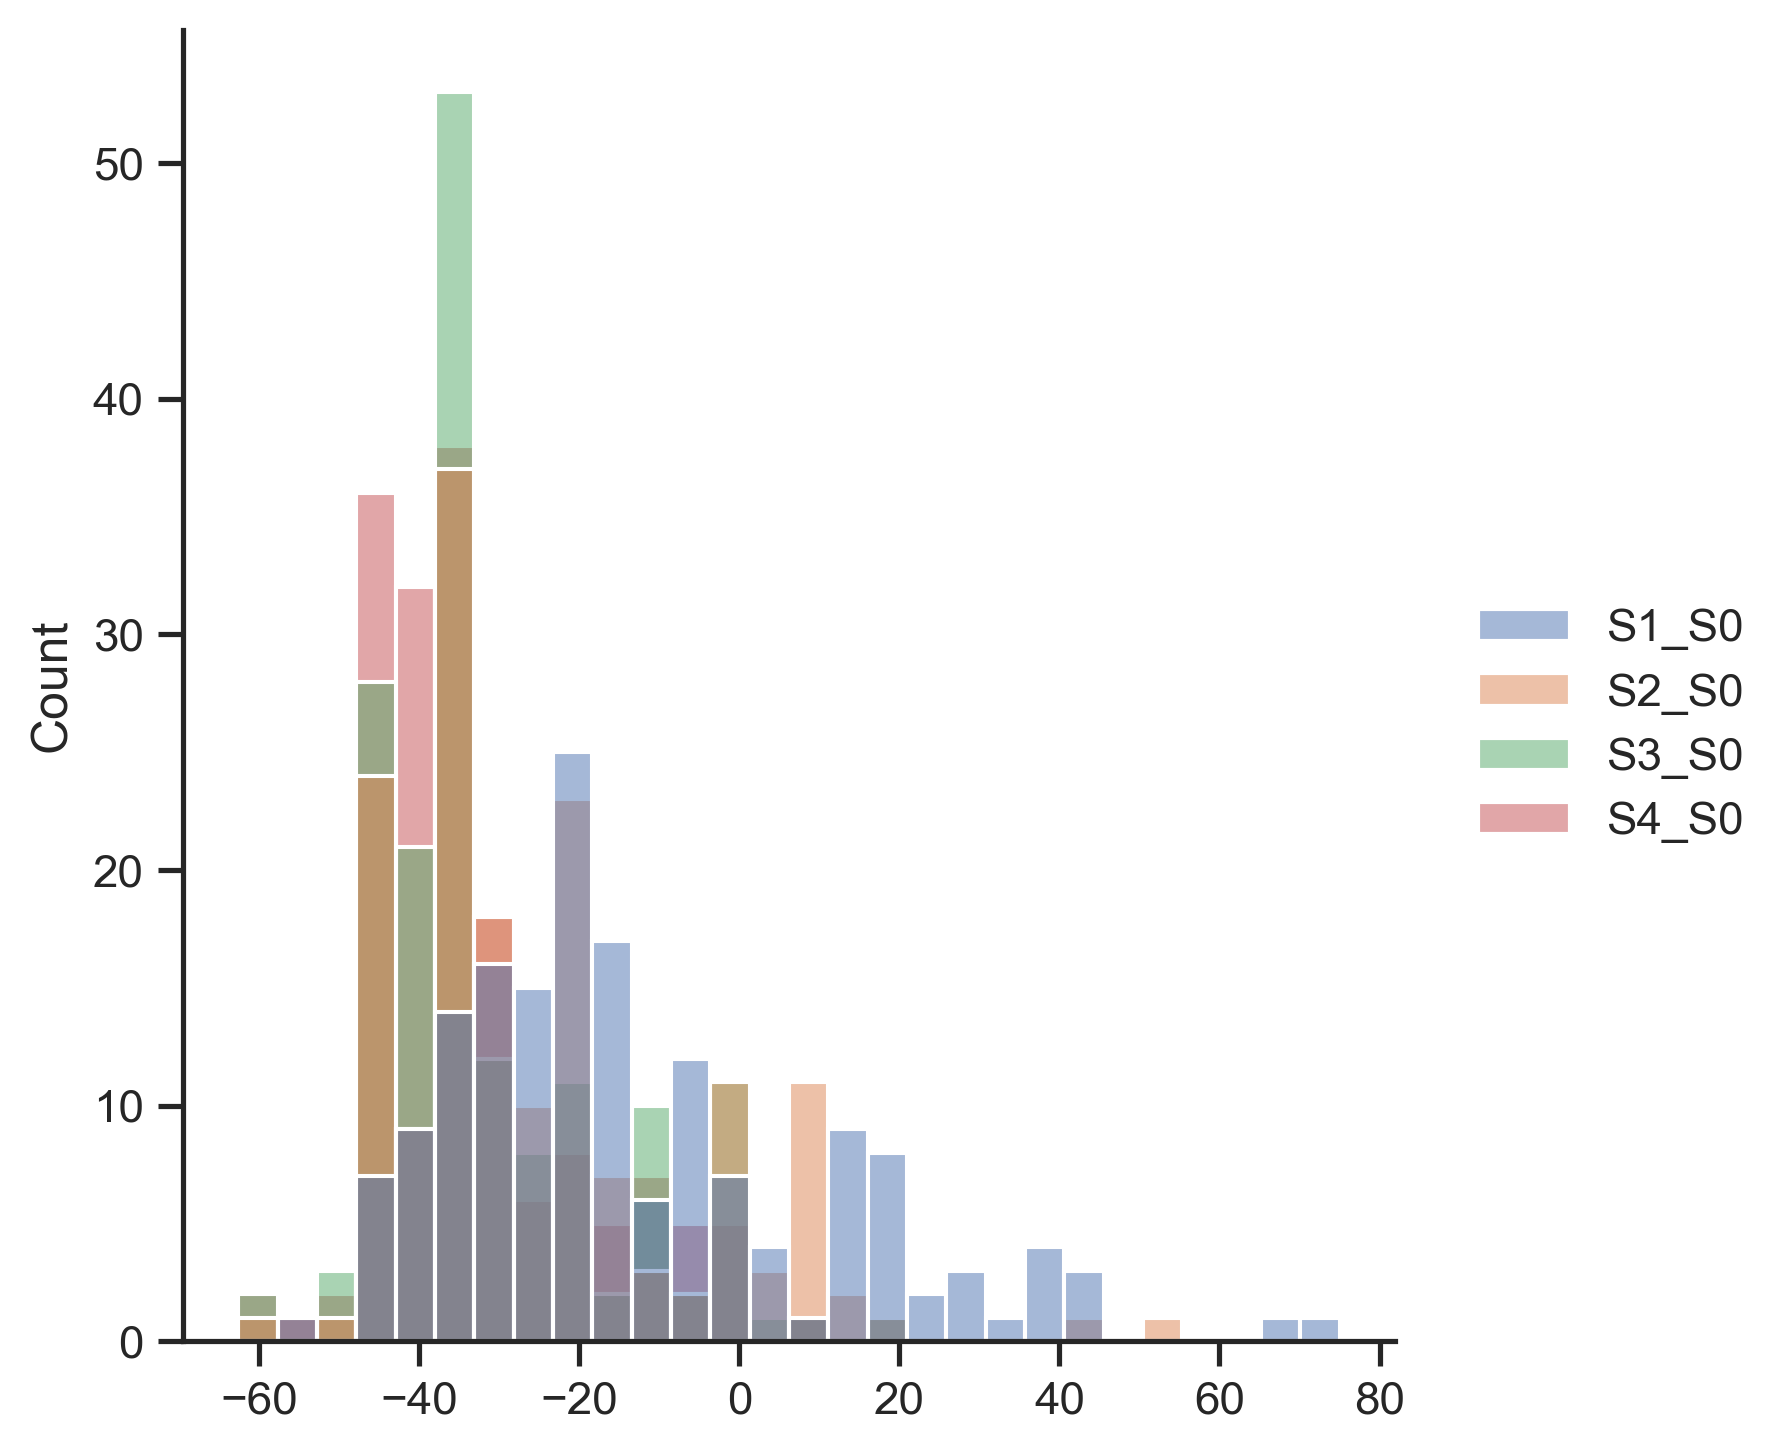

In [15]:
# Refs:
# https://seaborn.pydata.org/tutorial/distributions.html
# https://stackoverflow.com/questions/65759931/seaborn-kde-plot-plotting-probabilities-instead-of-density-histplot-without-bar

# In all of the following plots I think it was calculating the density based on the 664 observations
# that is why the density values were so low (0.008 - which multiplied by 4 gives 0.032)
# but i'm putting trials here for reference

# Plot 1
sns.displot(perchange)

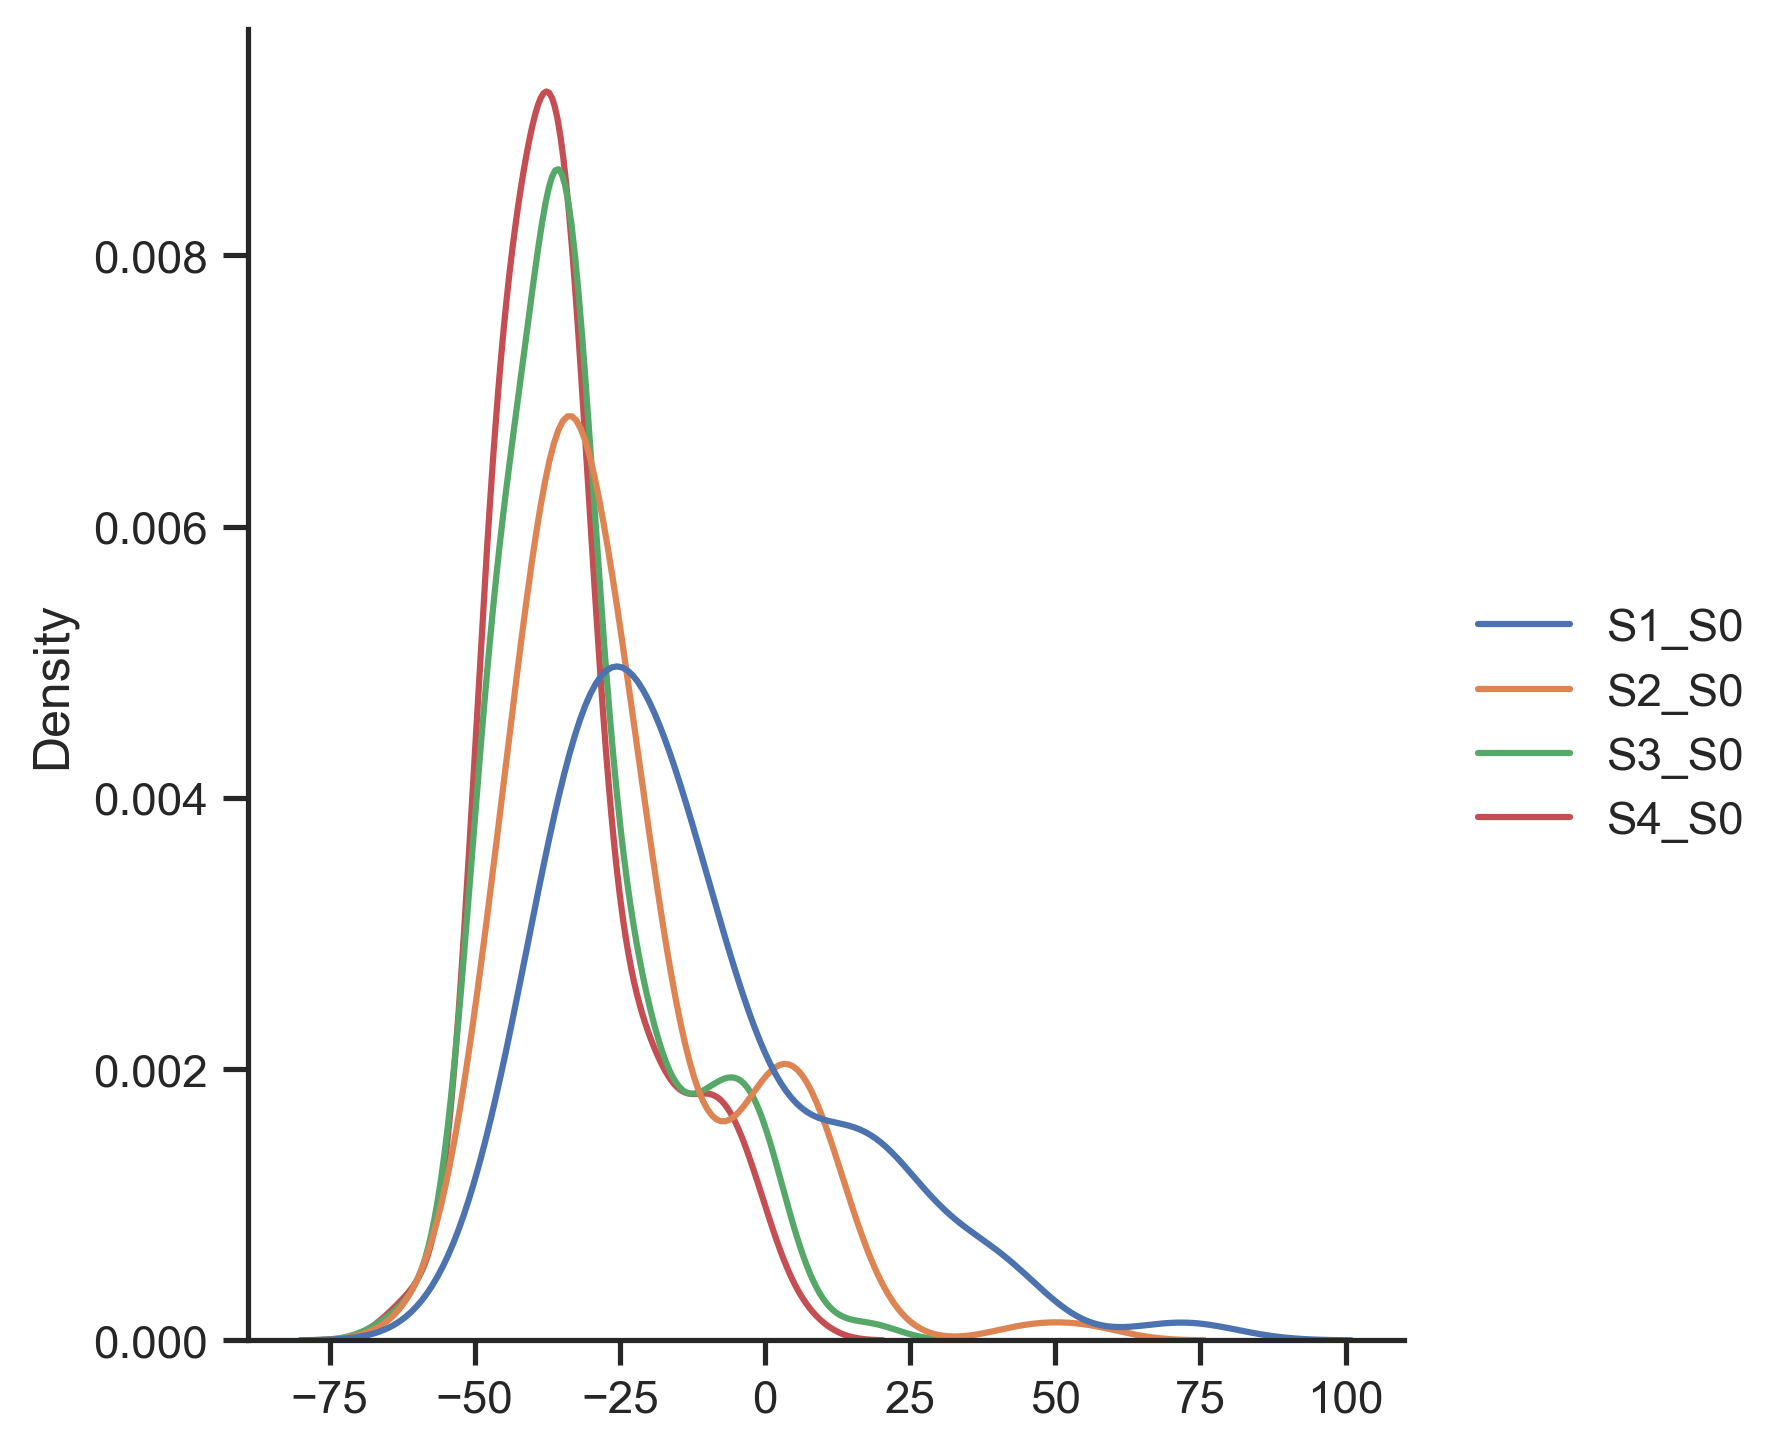

In [16]:
# Plotting density curves (este era el bueno antes)
# Plot 2
sns.displot(perchange, kind="kde") # fill=True

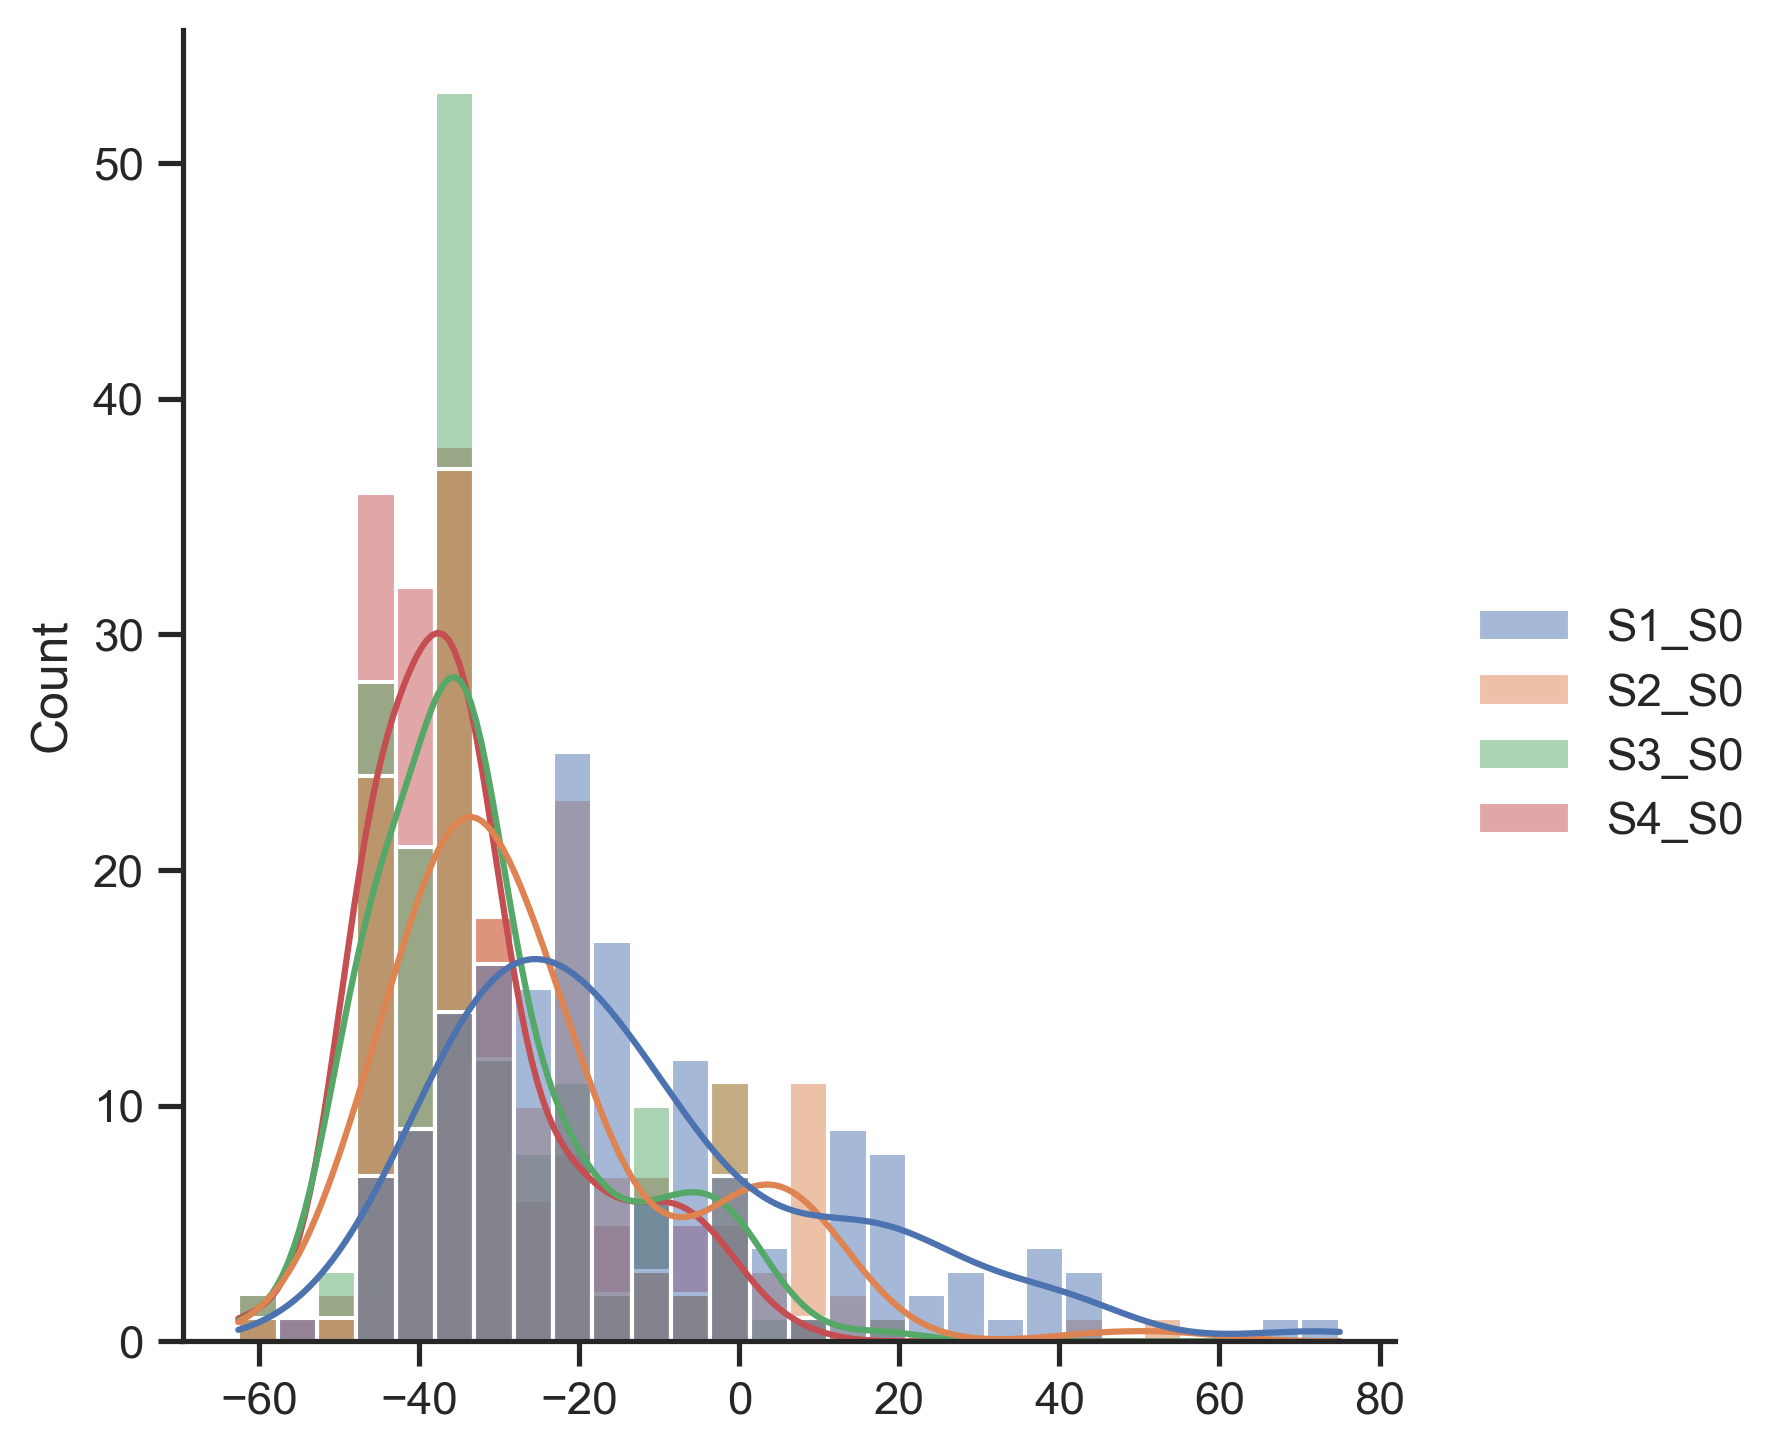

In [17]:
# Plot 3
sns.displot(perchange, kde=True)

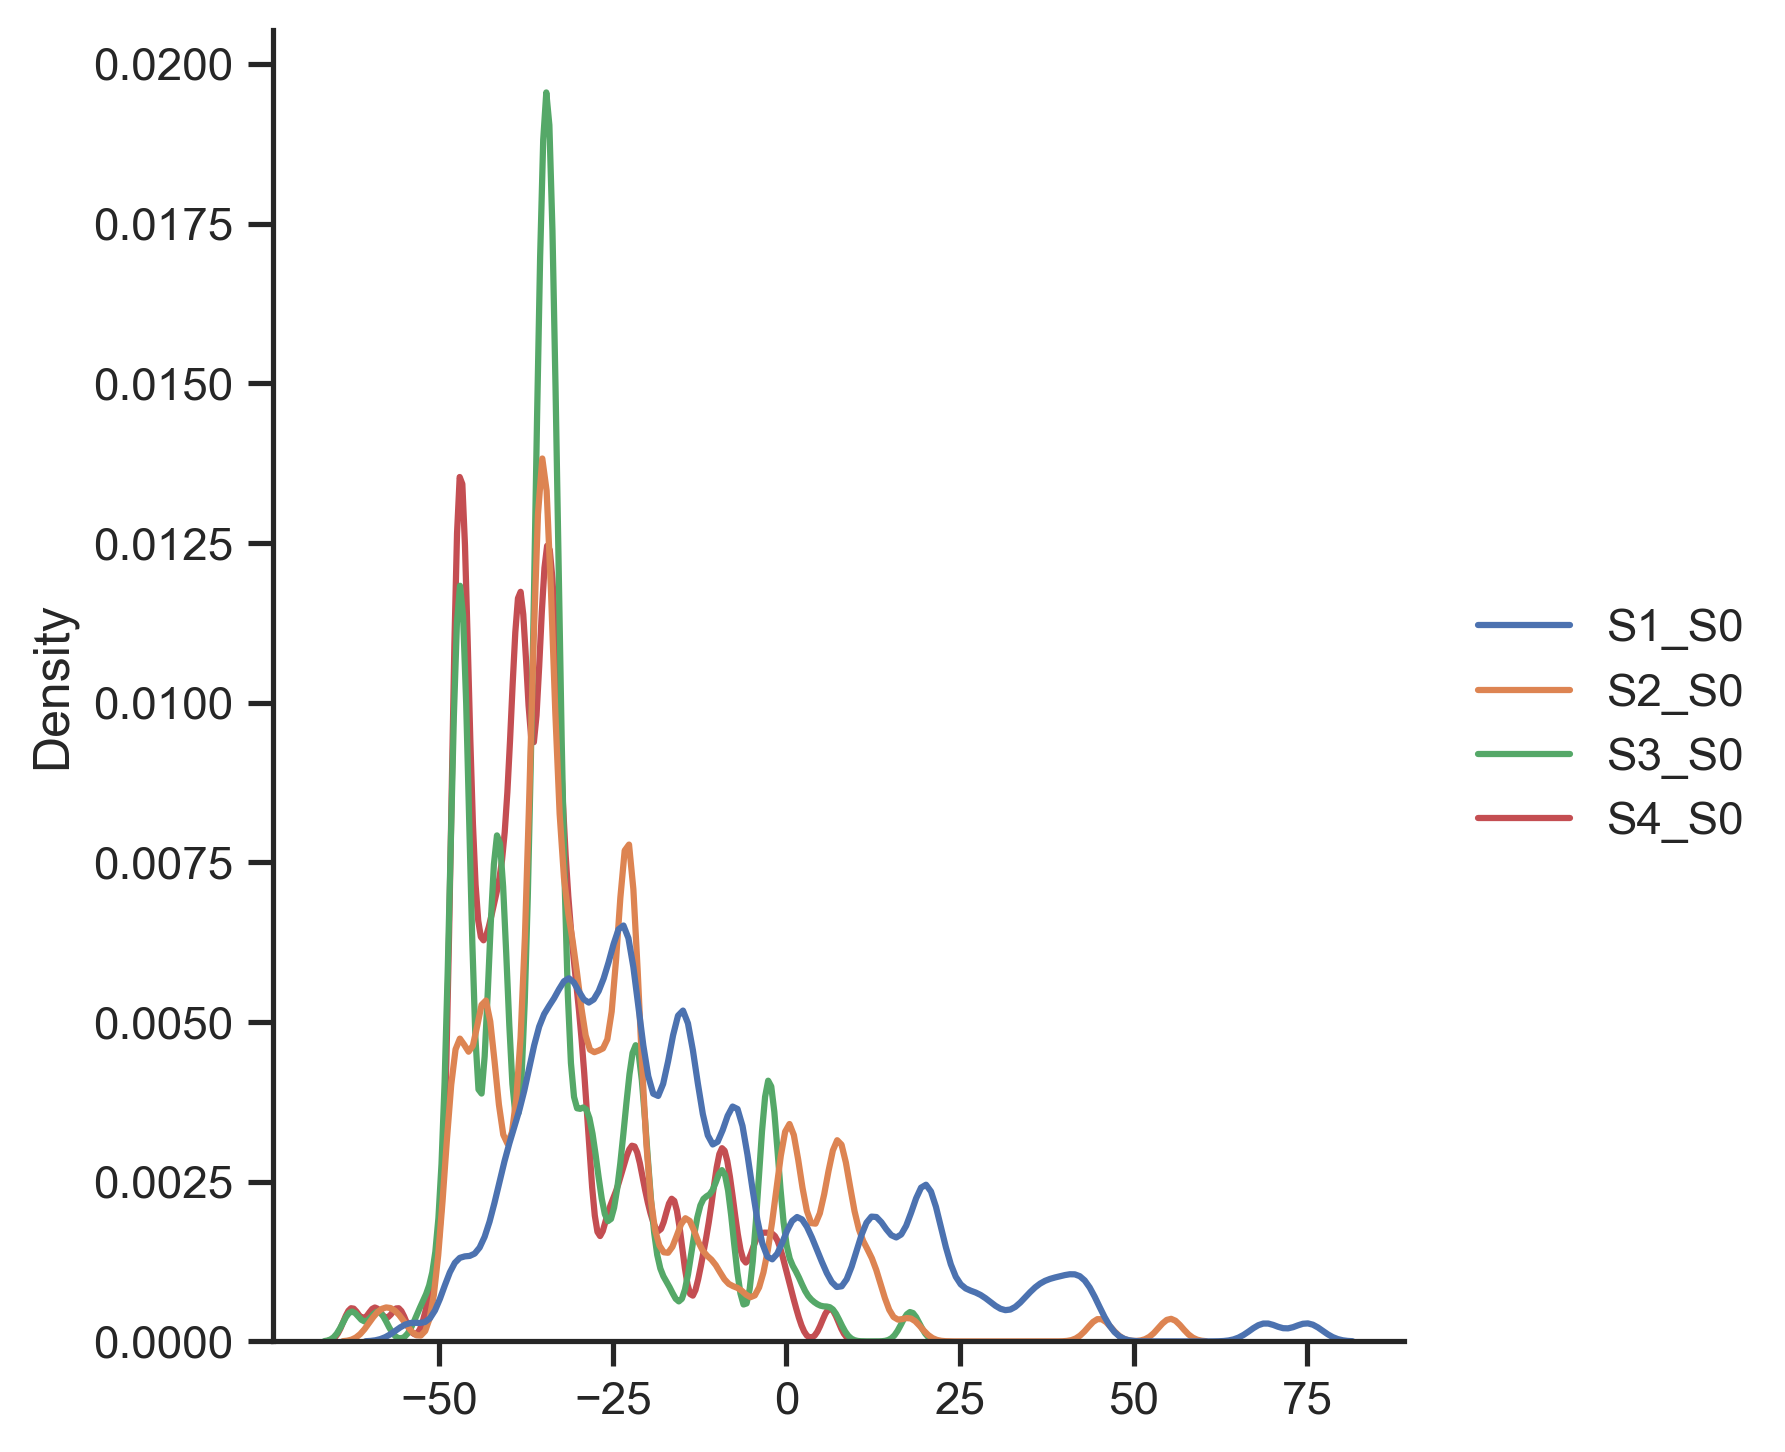

In [18]:
# Plot 4 - adjusting bandwidth to better represent the data (trial 1)
sns.displot(perchange, kind="kde", bw_adjust=.25) # or 0.5
# returns a plot with curve less smooth but shows bumps clearer
# however i'm not sure of the meaningfulness of these bumps (they could be bc of bad sample or systematic error)

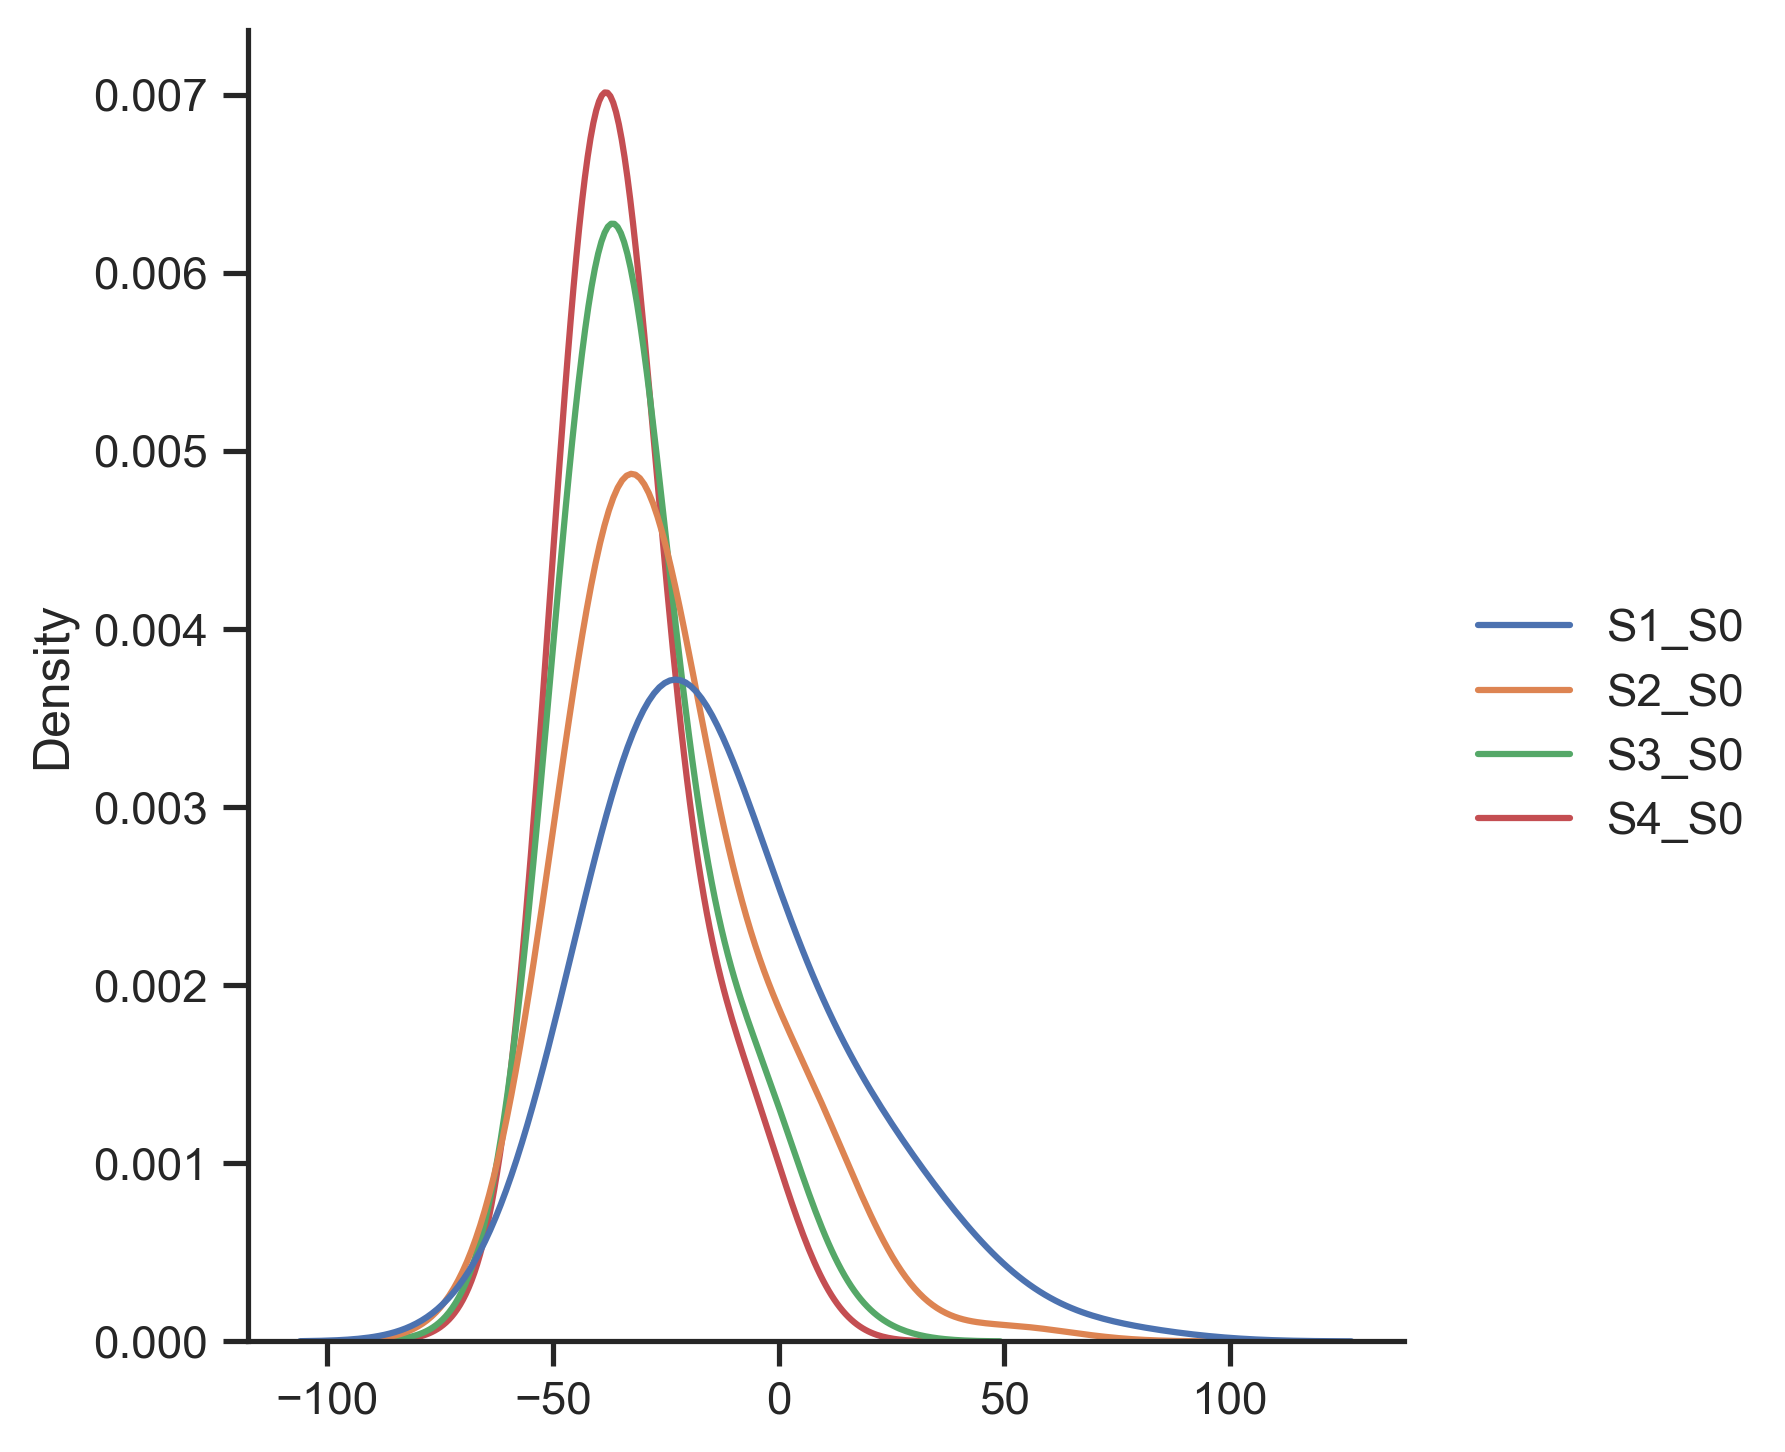

In [19]:
# Plot 5 - adjusting bandwidth to better represent the data (trial 2)
sns.displot(perchange, kind="kde", bw_adjust=2)
# curve is now too smooth, loses modes in dataset

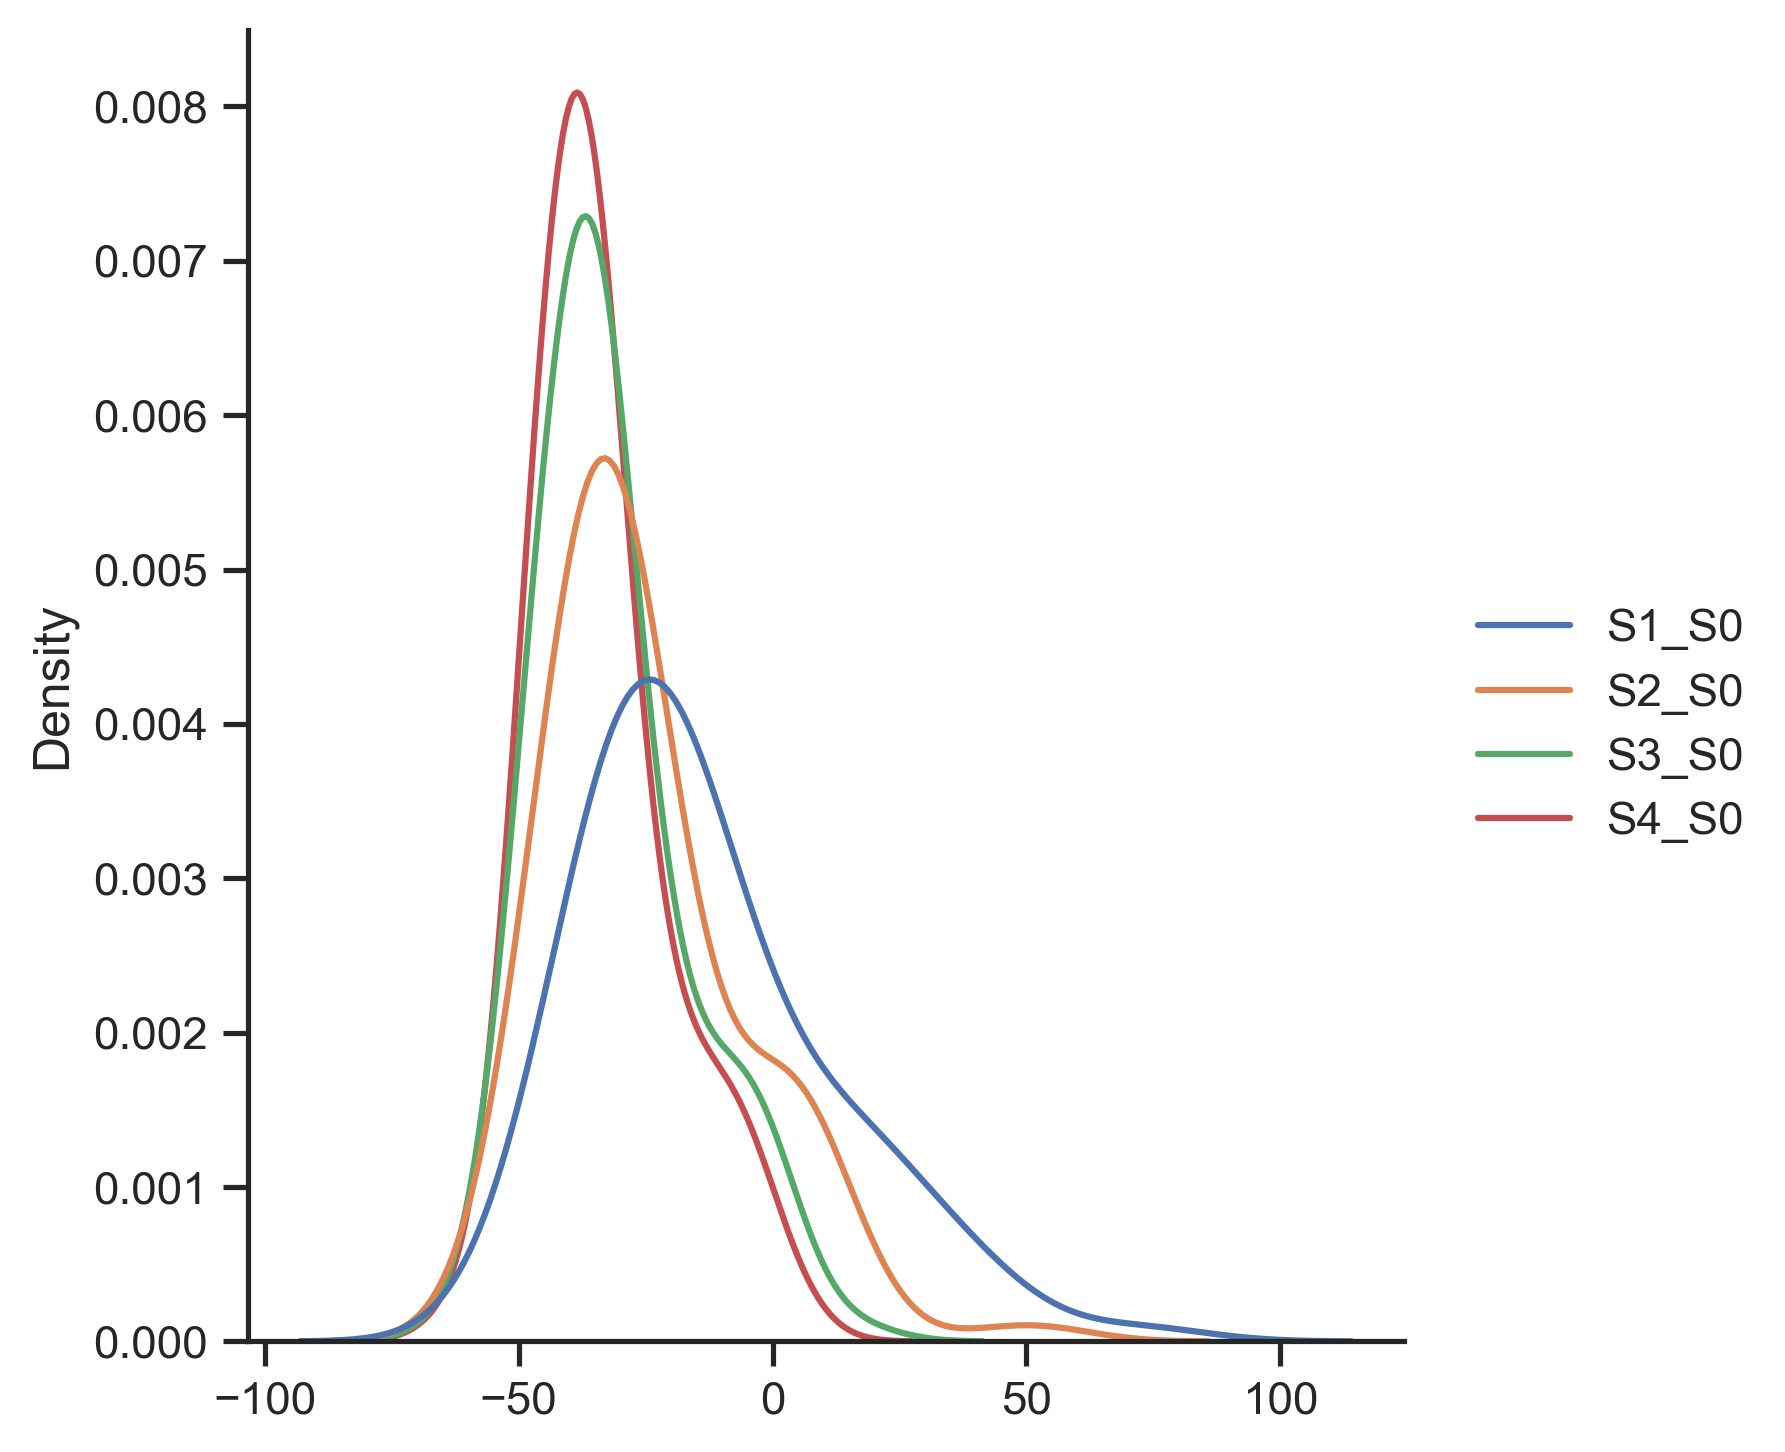

In [20]:
# Plot 6 - adjusting bandwidth to better represent the data (trial 3)
sns.displot(perchange, kind="kde", bw_adjust=1.5) # or 0.5
# curve is still too smooth (1.5) or too spikey (0.5) so i think is better to stick with default value of
# bw_adjust which I'm pretty sure default is 1

<AxesSubplot:xlabel='S1_S0', ylabel='Density'>

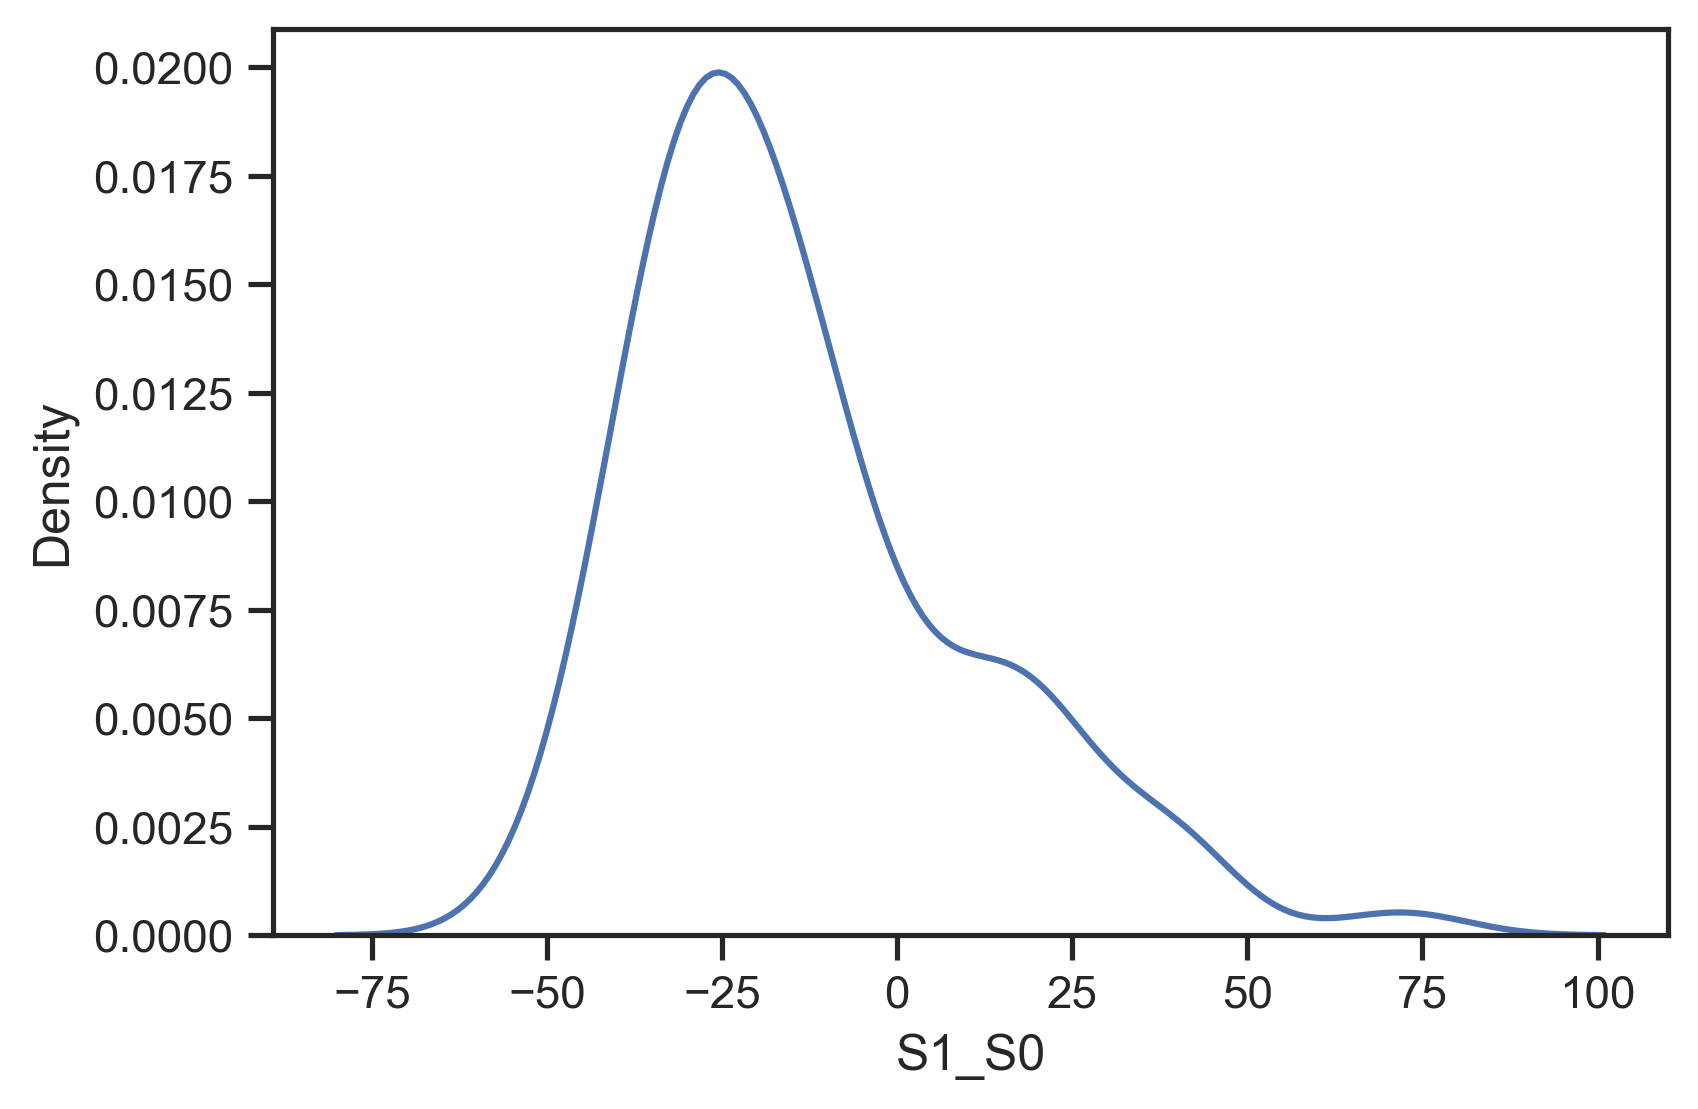

In [21]:
# Plot 7 - Plotting line by line
sns.kdeplot(perchange.S1_S0)  # shade=True
                              # cumulative=True (but not sure what this shows)

In [22]:
# Calculating the difference between the lines (instead of eyeballing plot)
# Using np.histogram to display the frequency of data distribution in a numerical form.
# Represents frequency (y-axis) and class interval call bin (x-axis)
np.histogram(perchange["S1_S0"], bins=3)

(array([106,  50,  10]),
 array([-54.12      , -11.06666667,  31.98666667,  75.04      ]))

In [23]:
#  meaning that it cut the data in 3 bins (-54 to -11; -11 to 31.98; 31.98 to 75)
# gives total observations (n=166) in each bin (106, 50, 10)

# Same as above but accessing certain elements of the return of np.histogram
np.histogram(perchange["S1_S0"], bins=3)[0] # or [1]

array([106,  50,  10])

In [24]:
# I can also specify the exact values of the bins
np.histogram(perchange["S1_S0"], bins=[-100,0,100])

(array([124,  42]), array([-100,    0,  100]))

In [26]:
# meaning that 124 observations have a cost difference lower than 0 (negative)
# and 42 have a cost difference higher than 0 (positive)
# Same as above but for S2
np.histogram(perchange["S2_S0"], bins=[-100,0,100])

(array([139,  27]), array([-100,    0,  100]))

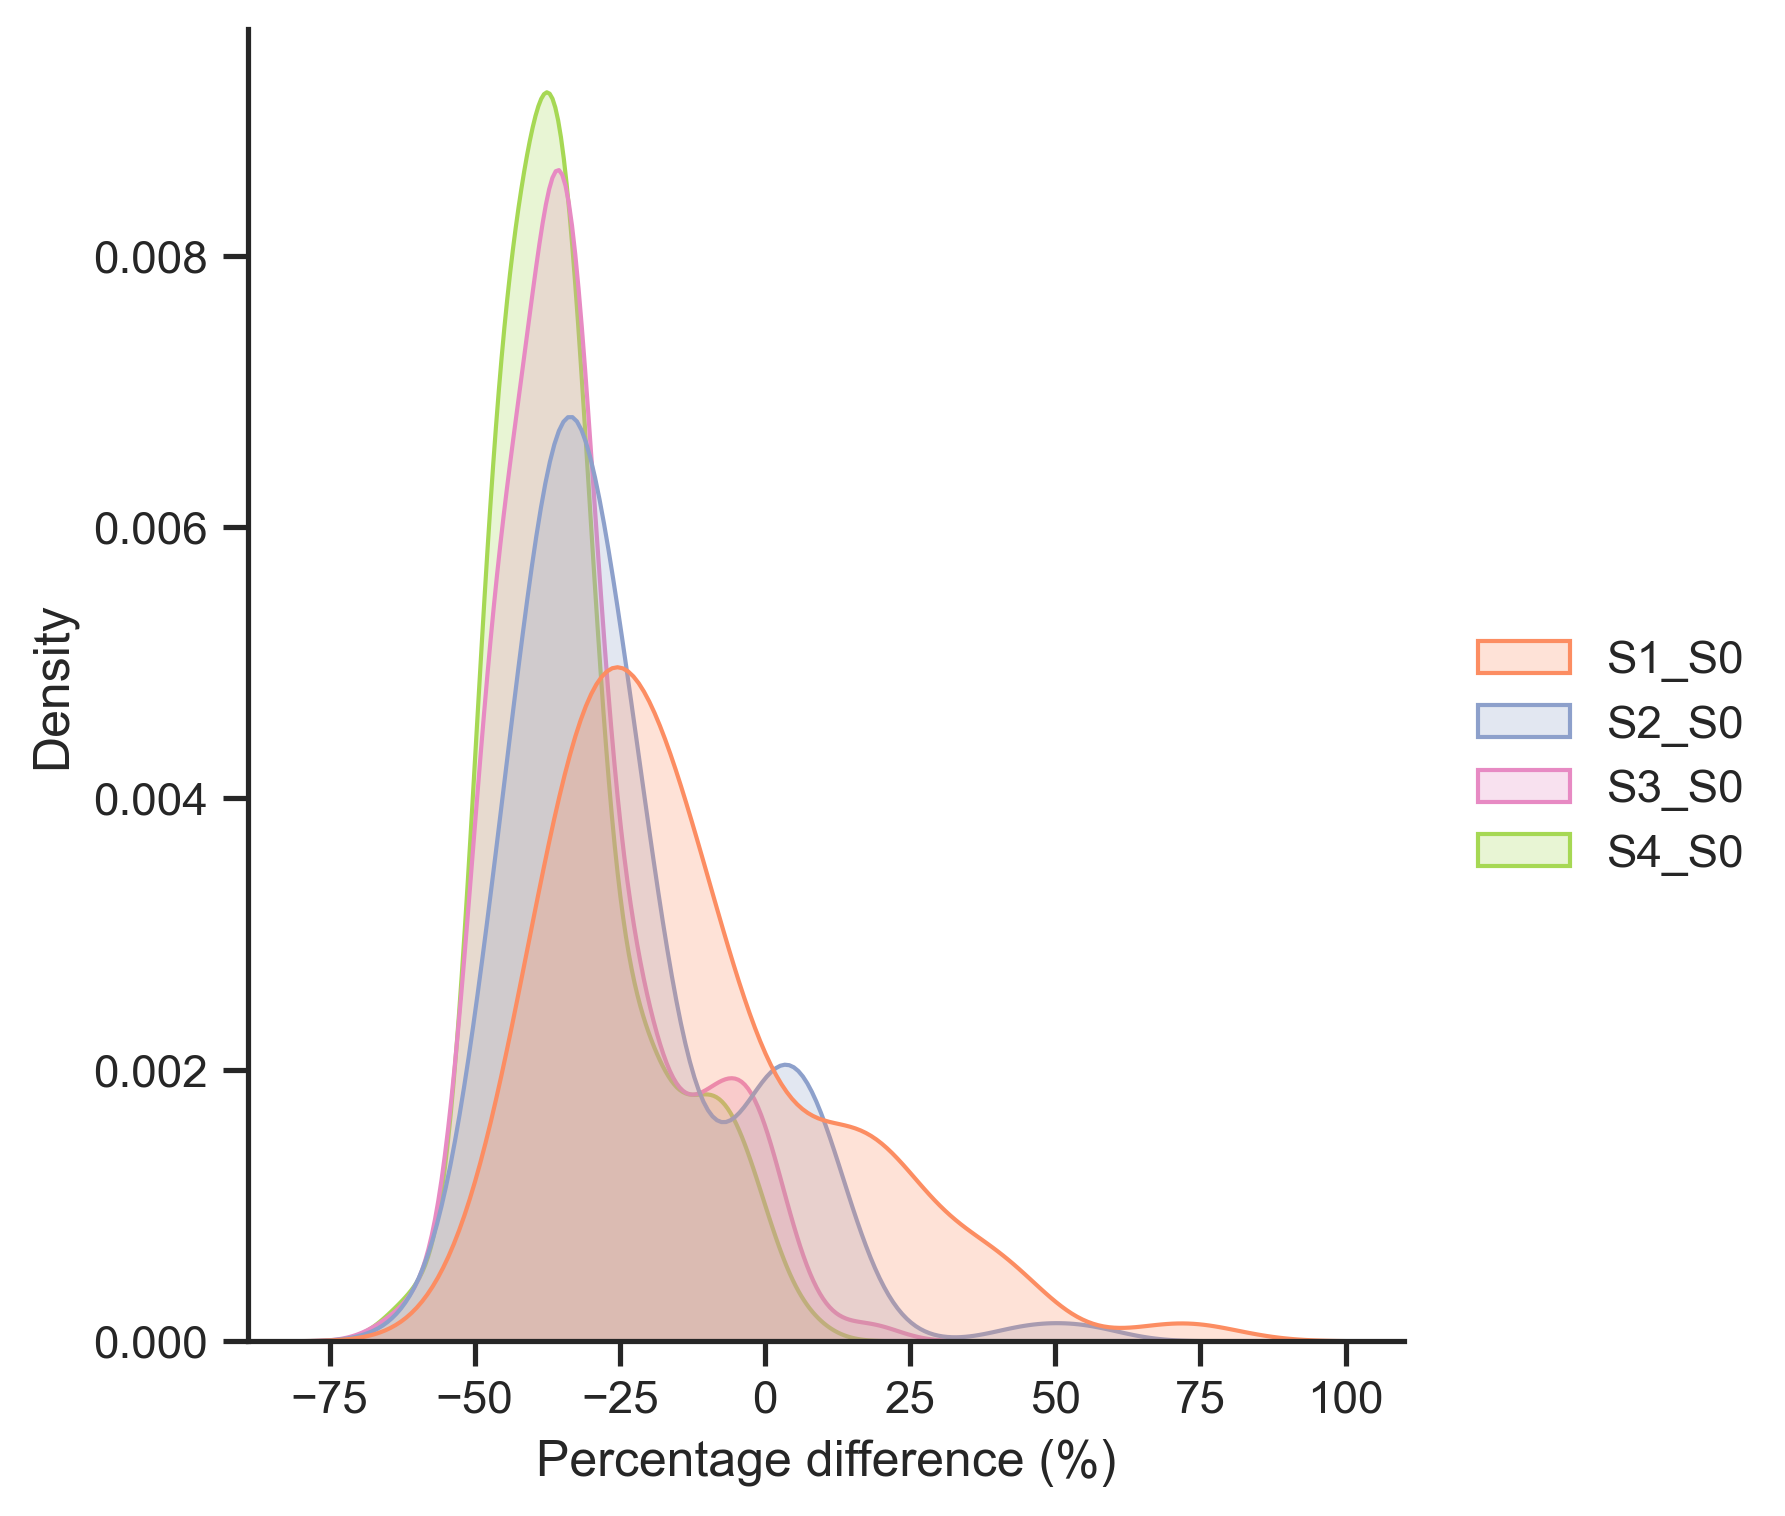

In [28]:
# NS said this means that the probability of having a cost increase for S1 is 40%
# and 30% for S2. So I think he just round up the 40 and 30 values above 0 but not
# completely sure that is how you interpret it?... double check

# Previous plot trials
ax= sns.displot(perchange, kind="kde", palette=colors, fill=True) #
ax.set(xlabel= "Percentage difference (%)")

In [ ]:
# See python version of this code for:
# Notes of other legend trials that didn't work properly (to avoid repeating it) 
# I struggle with legends and I put there all the trials to refer to them if needed in the future